## Implement Traslation and Scalling 

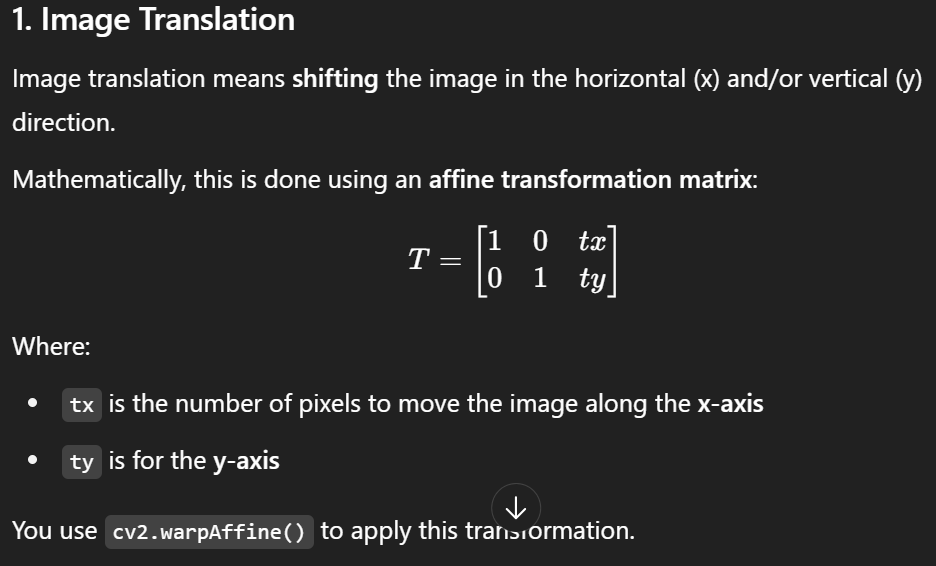

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

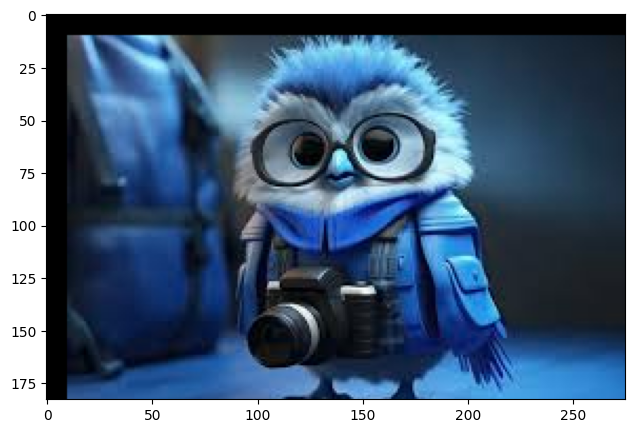

In [2]:
img = cv2.imread('image.png')
h,w = img.shape[:2]

tx = 10
ty = 10

translation_matrix = np.float32([[1,0,tx],[0,1,ty]])
tranlated_img = cv2.warpAffine(img, translation_matrix, (w,h))
plt.figure(figsize=(15,5))
plt.imshow(tranlated_img)


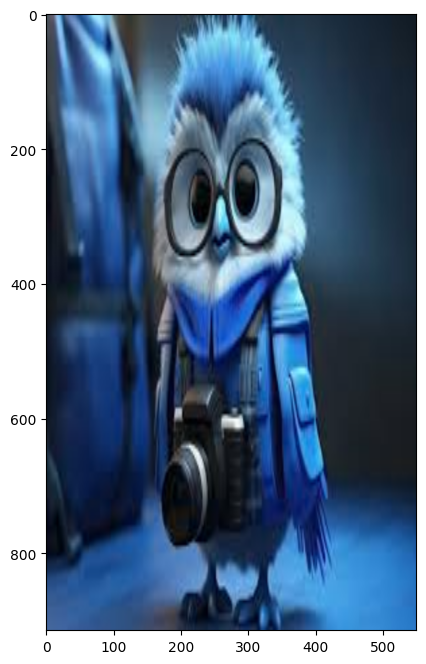

In [21]:
scale_x = 2
scale_y = 5

scaled_img = cv2.resize(img, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)

# Option 2: Using scaling matrix (less common for basic resizing)
'''scaling_matrix = np.float32([[scale_x, 0, 0], [0, scale_y, 0]])
scaled_img_affine = cv2.warpAffine(img, scaling_matrix, (int(w * scale_x), int(h * scale_y)))
'''

plt.figure(figsize=(12,8))
plt.imshow(scaled_img)

## Rotating image

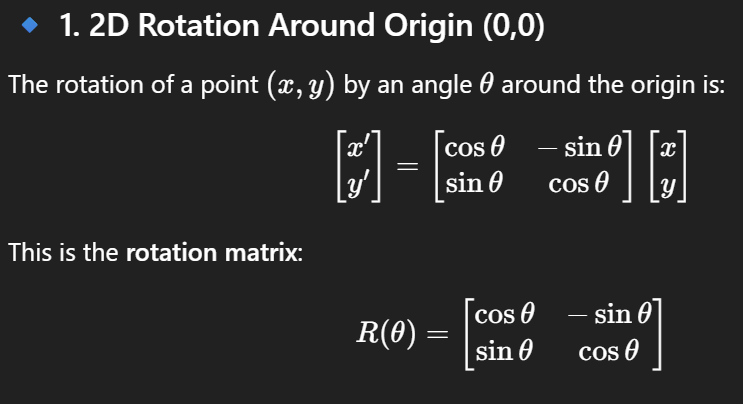

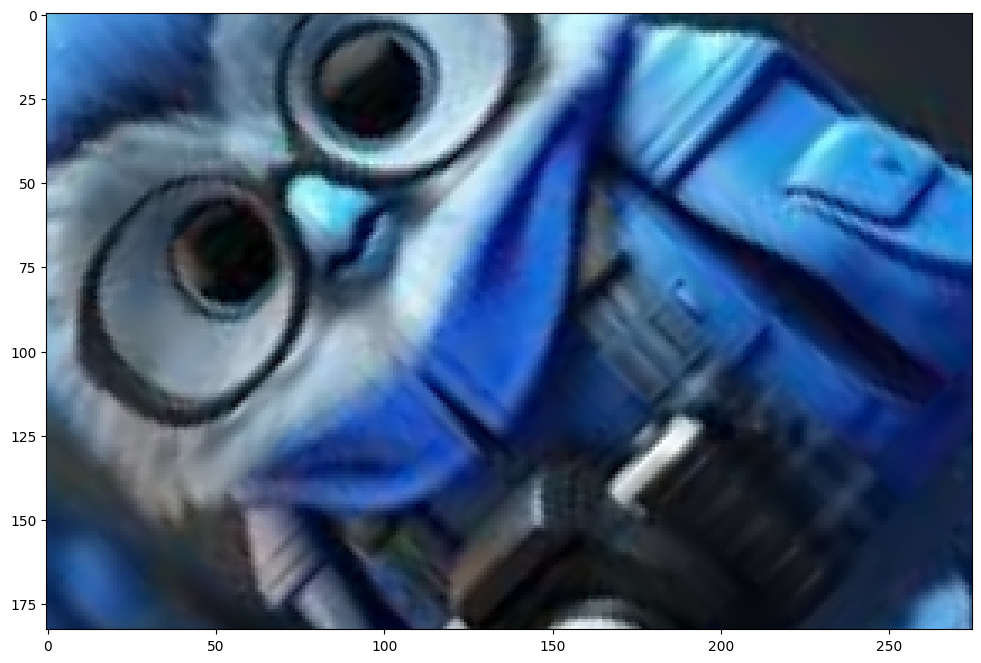

In [17]:
angle = 45
scale = 2

# finding the center of the img

center = (w//2, h//2)

rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_img = cv2.warpAffine(img, rotation_matrix, (w,h))

plt.figure(figsize=(12,8))
plt.imshow(rotated_img)

## performing all the operation manually

image height:  183
image width: 275


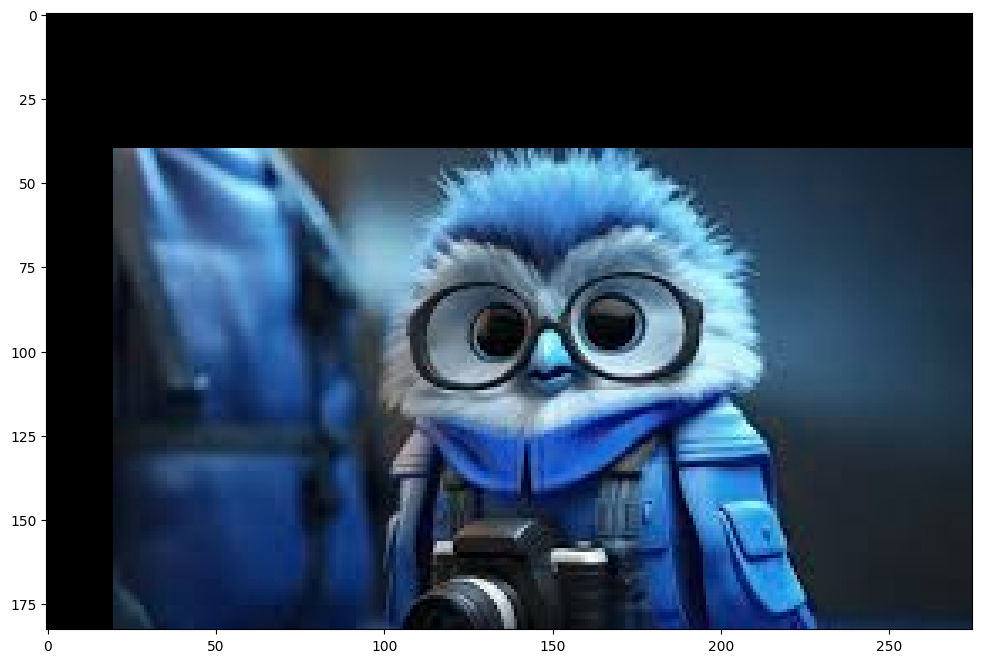

In [8]:
print("image height: ",h)
print("image width:", w)

tx = 20
ty = 40

#create a blank image similar to original image
tranlated_img = np.zeros_like(img)

for y in range(h):
    for x in range(w):
        new_x = x + tx
        new_y = y + ty
        
        # check bound before assigning
        if 0 <= new_x < w and 0<= new_y < h:
            tranlated_img[new_y, new_x] = img[y,x]
            
plt.figure(figsize=(12,8))
plt.imshow(tranlated_img)

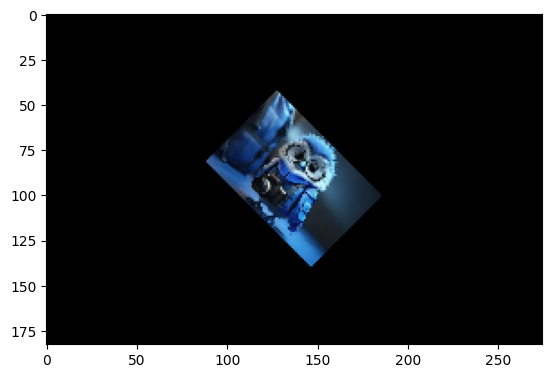

In [12]:
import math
# Rotation and scaling parameters
angle_deg = 45
scale = 0.3
angle_rad = math.radians(angle_deg)

# Center of rotation
cx, cy = w // 2, h // 2

# Create a blank canvas for output (you can also calculate required size if needed)
output = np.zeros_like(img)

# Precompute cos and sin
cos_theta = math.cos(angle_rad)
sin_theta = math.sin(angle_rad)

# Inverse mapping: for each pixel in output, map to source
for y_new in range(h):
    for x_new in range(w):
        # Translate point back to origin (center)
        x_shifted = x_new - cx
        y_shifted = y_new - cy

        # Apply inverse rotation and scaling
        x_orig = (x_shifted * cos_theta + y_shifted * sin_theta) / scale
        y_orig = (-x_shifted * sin_theta + y_shifted * cos_theta) / scale

        # Translate back to image coordinates
        x_src = int(x_orig + cx)
        y_src = int(y_orig + cy)

        # Check bounds and copy pixel
        if 0 <= x_src < w and 0 <= y_src < h:
            output[y_new, x_new] = img[y_src, x_src]

# Display result
plt.imshow(output)

## Quantization

reducing no of colour in the image

[[[ 75  91  98]
  [ 78  89  97]
  [ 85  87  97]
  ...
  [ 18  27  36]
  [ 18  27  36]
  [ 18  27  36]]

 [[ 71  87  94]
  [ 74  85  93]
  [ 81  83  93]
  ...
  [ 18  27  36]
  [ 18  27  36]
  [ 18  27  36]]

 [[ 69  82  90]
  [ 72  81  90]
  [ 76  78  88]
  ...
  [ 18  27  36]
  [ 18  27  36]
  [ 18  27  36]]

 ...

 [[ 67 101 155]
  [ 67 101 155]
  [ 67 101 155]
  ...
  [ 42 119 198]
  [ 42 119 198]
  [ 42 119 198]]

 [[ 68 102 156]
  [ 68 102 156]
  [ 68 102 156]
  ...
  [ 44 121 200]
  [ 43 120 199]
  [ 43 120 199]]

 [[ 69 103 157]
  [ 69 103 157]
  [ 69 103 157]
  ...
  [ 45 122 201]
  [ 44 121 200]
  [ 44 121 200]]]


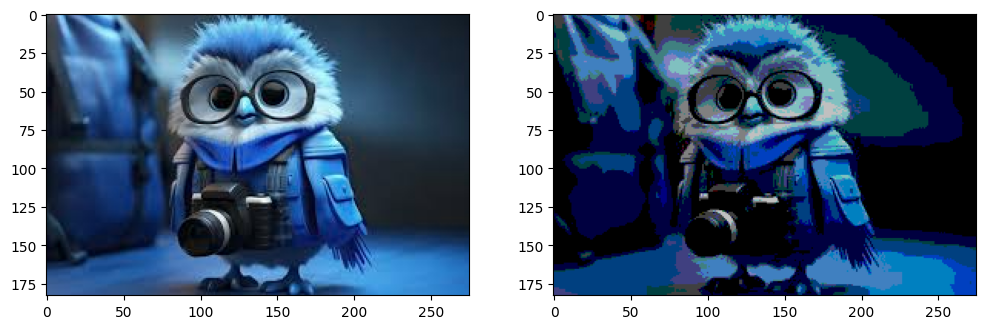

In [ ]:
import cv2
import numpy as np

# Load image (grayscale or color)
img = cv2.imread('image.png')  # Replace with your image path

print(img)

# Set quantization level
Q = 64  # value to quantize with

# Perform quantization
quantized_img = (img // Q) * Q

# Display results
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(quantized_img)
